# Lektion 3: Daten laden und visualisieren

In der letzten Lektion haben Sie sich mit Grundlagen von R vertraut gemacht. In dieser Lektion werden wir diese Grundlagen nutzen, um Daten mit verschiedenen Diagrammen zu visualisieren.

Die grafische Darstellung von Daten erlaubt oft einen schnellen Einblick - nicht nur in die verschiedenen erhobenen Parameter, sondern auch in die Beziehung einzelner Parameter zueinander. So lassen sich erste Ideen entwickeln, wie die Daten (im Hinblick auf die untersuchte Forschungsfrage) interpretiert werden können.

Diese Interpretation lässt sich dann im nächsten Schritt durch die Verwendung statistischer Tools erhärten. Entsprechende Tools lernen Sie in der nächsten Lektion kennen.

#### Lernziele
In dieser Lektion lernen Sie:
- Wie Sie Daten in R laden und betrachten.
- Wie Sie aus einem Wertebereich Histogramme, Balkendiagramme oder Kastengrafiken erzeugen.
- Wie Sie aus mehreren Wertebereichen Streudiagramme oder Kastengrafiken erzeugen.

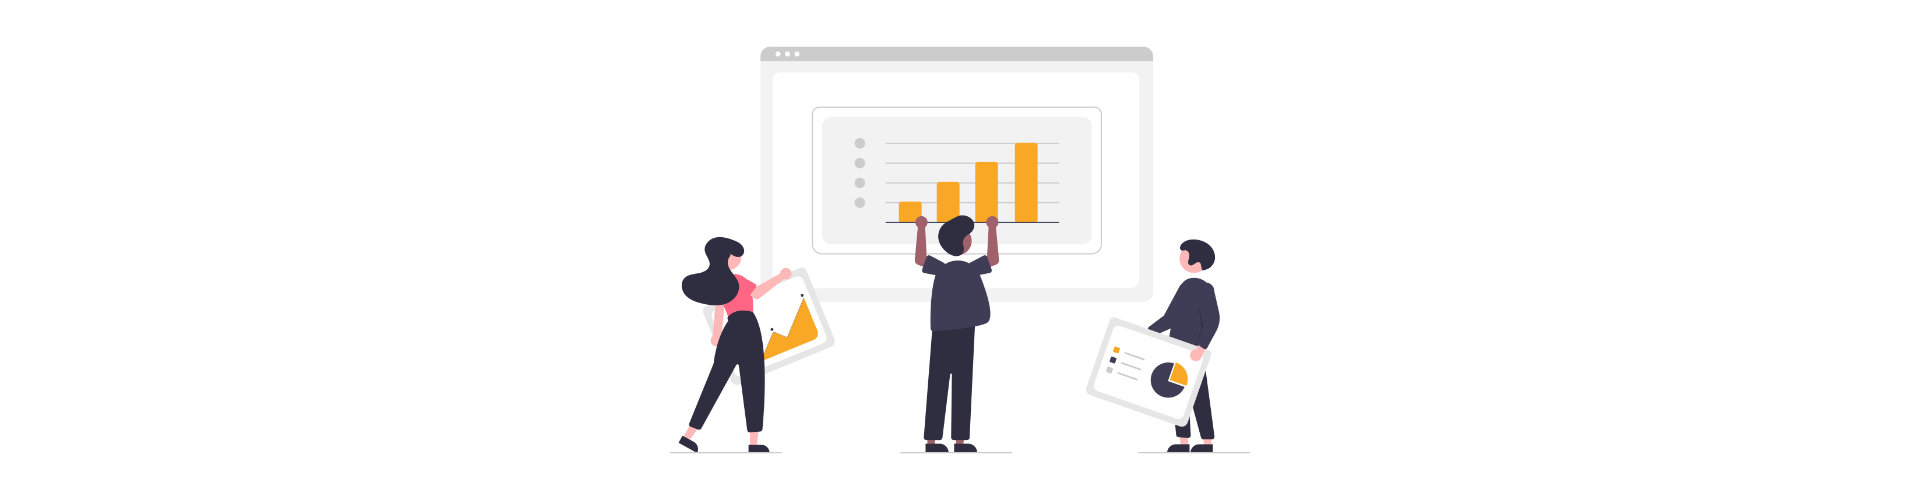

# Daten laden

Zunächst benötigen wir Daten, mit denen wir arbeiten können. Soweit es die Arbeit mit R betrifft, spielt es keine Rolle, woher Sie diese Daten bekommen; wichtig ist lediglich, dass die Daten in einem _digitalen_ und _tabellarischen_ Format vorliegen.

## Beispiel: Testergebnisse von Schüler:innen 🧪

Schauen wir uns als Beispiel die Daten einer (fiktiven) Studie an, die Testergebnisse von 100 Schüler:innen in Mathematik, Lesen und Schreiben untersucht. Darüber hinaus wurden auch Parameter wie Gender, Ausbildung der Eltern oder die Teilnahme am Vorbereitungskurs festgehalten.

Die Werte werden uns als Tabelle zur Verfügung gestellt. Jede Zeile steht für eine Schüler:in, jede Spalte für einen der o.g. Werte:

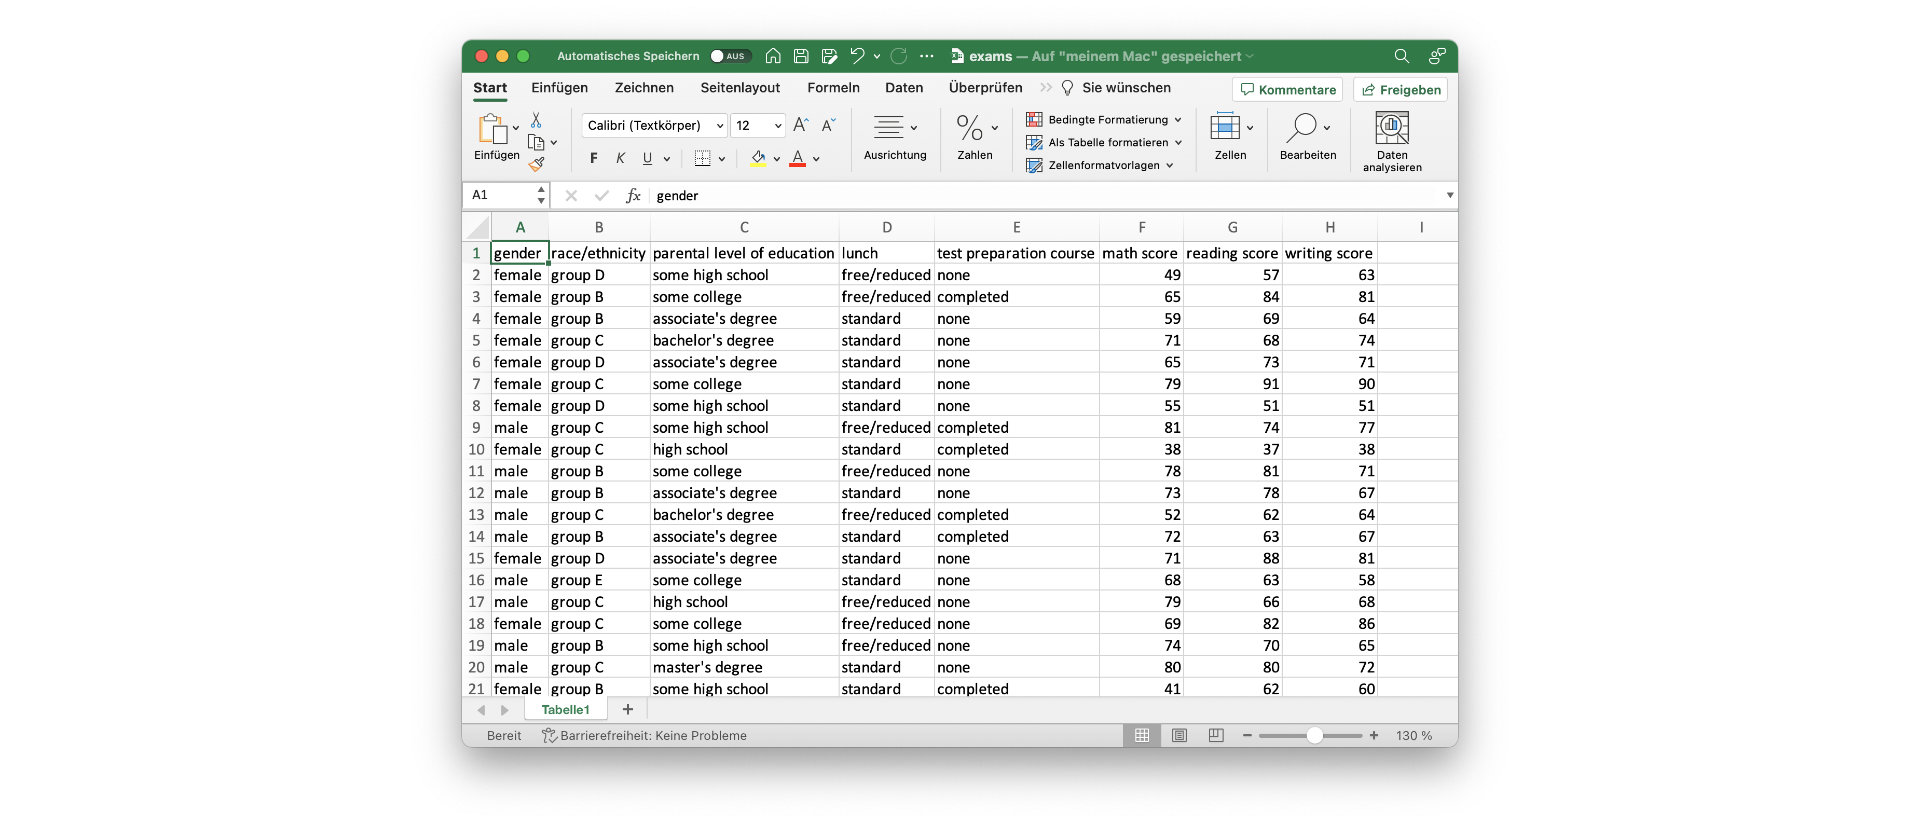

Um die Daten aus Excel in R zu laden, müssen wir diese zunächst in einem Dateiformat speichern, das R lesen kann. CSV (_comma separated values_) eignet sich dafür besonders gut; um in Excel eine Tabelle als CSV zu speichern, nutzen Sie `Speichern unter… → Dateiformat → CSV → Sichern` (eine analoge Option findet sich auch in jedem anderen Tabellenkalkulationsprogramm).

Die so gespeicherte Datei enthält die selben Werte wie unsere Tabelle, trennt diese aber durch Kommata:
```
"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"
"female","group D","some high school","free/reduced","none","49","57","63"
"female","group B","some college","free/reduced","completed","65","84","81"
"female","group B","associate's degree","standard","none","59","69","64"
"female","group C","bachelor's degree","standard","none","71","68","74"
…
```

## Daten in R laden

Unsere CSV-Datei enthält nun also die Daten, die wir in R analysieren möchten. Um die Datei in unserem Notizbuch zu nutzen, müssen wir Sie zunächst herunterladen; anschließend können wir Sie über die Funktion `read.csv("pfad/zur/datei.csv")` laden.

Die Funktion erstellt einen Dataframe aus den Daten; um mit den Daten weiterzuarbeiten, weisen wir diesen auch direkt einer Variable zu:

In [ ]:
# Download der Datei; das erste Argument gibt die Quelle an, das zweite den Namen der Datei nach dem Download
download.file("https://github.com/paulHasselkuss/intro-to-r/raw/main/data/exams.csv", "exams.csv")

# Laden der Datei in einen Dataframe
data <- read.csv("exams.csv")

Mit der Funktion `head()` können wir kontrollieren, ob die Variable `data` tatsächlich die Daten enthält, die wir erwarten (die Funktion zeigt die ersten 6 Einträge an):

In [ ]:
head(data)

Unsere Daten enthalten nur die Scores für Mathematik, Lesen und Schreiben (ganz rechts in der obigen Darstellung). Lassen Sie uns ein­fach­heits­hal­ber noch eine Spalte mit der Gesamtpunktzahl hinzufügen und den so erweiterten Dataframe erneut speichern:

In [ ]:
data <- transform(data, total.score = math.score + reading.score + writing.score)

# Daten visualisieren

Im nächsten Schritt werden wir die Daten aus dem Dataframe `data` nutzen, um aus den Werten Diagramme zu erstellen. Diese werden uns einen ersten Eindruck über die Verteilung der Werte vermitteln.

## Histogramme: `hist()`

Ein Histogramm gibt Auskunft über die absolute Häufigkeit einzelner Werte, d.h. es zeigt, wie häufig ein Wert im Datensatz vorkommt. Schauen wir uns als Beispiel die Gesamtpunkzahl (`total.score`)  an. Wie gehabt nutzen wir `$`, um die Spalte des Dataframes auszulesen:

In [ ]:
hist(data$total.score)

Die absolute Häufigkeit (_frequency_) ist auf der vertikalen Y-Achse sichtbar, die Daten (von `80` bis `300`) auf der waagerechten X-Achse.

Die Skala der X-Achse, d.h. wie die Werte unterteilt sind, wird von R automatisch gewählt. Wir können aber auch explizit eine Unterteilung vorgeben, indem wir die Anzahl der gewünschten Unterteilungen definieren:


In [ ]:
hist(data$total.score, breaks = 4)
# 4 Breakpoints: 100, 150, 200, 250

Auch darüberhinaus ist `hist()` sehr flexibel. Über optionale Argumente können wir z.B. auch Titel und Achsenbeschriftungen anpassen und die Anzahl der Werte pro Balken ausgeben:

In [ ]:
hist(data$total.score,
     breaks = 4,
     main="Total Score",
     xlab="Score",
     labels=TRUE)

## Balkendiagramme: `barplot()`

Als nächstes möchten wir wissen, wie viele der Proband:innen den Vorbereitungskurs abgeschlossen haben. Unser Dataframe enthält diese Daten unter `test.preparation.course`; versuchen wir zunächst, ein Histogramm zu erstellen:

In [ ]:
# Nicht wundern, diese Funktion klappt nicht.
hist(data$test.preparation.course)

Wie Sie sehen, erhalten Sie eine Fehlermeldung: Die Werte des Vektors sind nicht numerisch! Kontrollieren wir dies, indem wir einen Blick auf die Werte werfen:

In [ ]:
head(data$test.preparation.course)

Der Vektor enthält die Textwerte `none` und `completed`! Diese können wir tatsächlich nicht mit einem Histogramm auswerten. Wir können aber die Funktion `table()` benutzen, um uns die Anzahl der jeweiligen Werte anzeigen zu lassen:

In [ ]:
table(data$test.preparation.course)

Diese Werte können wir nun nutzen, um ein Balkendiagramm zu erstellen, das die von uns gewünschte Darstellung bietet:

In [ ]:
prepCourse <- table(data$test.preparation.course)
barplot(prepCourse)

## Kastengrafiken: `boxplot()`

Anhand des Histogramms haben wir bereits die Häufigkeit der verschiedenen Scores festgestellt. Wenn wir verstehen möchten, wie die Scores innerhalb des Kurses verteilt sind, ist dies nur bedingt aussagekräftig. Hilfreicher ist stattdessen die Kastengrafik (eng. _Boxplot_):

In [ ]:
boxplot(data$total.score)

Was sehen wir?
* Die vertikale **Y-Achse** gibt die Skala an, hier die Punktzahl;
* Die **graue Box** zeigt der Bereich, in dem 50% aller Werte liegen. Die Länge der Box entspricht dem Interquartilsabstand, d.h. dem Abstand zwischen dem oberen und unteren Viertel der Werte.
* Die **beiden Striche** zeigen die Verteilung des besseren und des schlechteren Viertels. Der "beste" Wert nach oben liegt bei `300`, der schlechteste bei etwa unter `130`.
* Der **schwarze Strich in der Box** zeigt den Durchschnitt aller Werte (dazu mehr in der nächsten Lektion).
* Die **zwei Kreise** sind Ausreißer. Dies sind Werte, die (statistisch) deutlich von den anderen Werten abweichen.

Box-Plots können auch mehrere Wertebereiche parallel abbilden, solange diese auf der gleichen Skala darstellbar sind. Schauen wir uns z.B. die Scores in Schreiben, Lesen und Mathematik nebeneinander an:

In [ ]:
boxplot(data$writing.score, data$reading.score, data$math.score, names=c("Writing", "Reading", "Math"))

# Daten gegeinander auftragen: `plot()`

Bisher haben wir einzelne Datenreihen, wie den Gesamtscore, visualisiert. Außerdem haben wir verschiedene Werte des gleichen Typs, wie die Scores im Lese-, Schreib- und Mathetest nebeneinander abgebildet.

Natürlich können wir aber auch zwei Werte gegeinander auftragen. Die daraus resultierende Darstellung vermittelt uns einen Eindruck darüber, ob und wie beide Werte miteinander interagieren - z.B. ob eine Korrelation vorliegt.

Im Folgenden nutzen wir die Funktion `plot()`, um verschiedene Daten gegeneinander aufzutragen.

## Streudiagramme

In einem Steudiagramm wird der eine Wert auf der X-, der anderen auf der Y-Achse aufgetragen. Betrachten wir als Beispiel die Scores im Lese- und Schreibtest:

In [ ]:
plot(data$reading.score, data$writing.score)

Das Bild zeigt deutlich, dass beide Werte tendentiell korrelieren: Je besser der Score im Lesetest, desto besser der Score im Schreibtest - und umgekehrt.

## Kastengrafik

Was passiert, wenn einer der Werte kein Zahl ist? Betrachten wir als Beispiel den Besuch des Vorbereitungskurses (`test.preparation.course`). Dessen Werte sind wieder Textwerte (`completed` und `none`):

In [ ]:
data$test.preparation.course

Um diese mittels `plot()`  gegen den Gesamtscore aufzutragen, müssen wir zusätzlich die Methode `as.factor()` benutzen. Damit machen wir klar, dass die Textwerte aus `test.preparation.course` im Diagramm als Faktor genutzt werden sollen:

In [ ]:
# In Faktor umwandeln
courseFactor <- as.factor(data$test.preparation.course)
# Plot erstellen
plot(courseFactor, data$total.score)

Was sagt uns der Kastenplot über den Zusammenhang beider Werte? Einerseits, dass  der Durchschnitt ungefähr gleich ausfällt, egal ob der Vorbereitungskurs besucht wurde oder nicht. Andererseits schneiden Studierende, die den Kurs _nicht_ besucht haben, auch deutlich schlechter ab. Man könnte also sagen: Der Kurs scheint insbesondere schwächeren Studierenden zu helfen - oder diese Besuchen den Kurs nicht.

## Matrix

Betrachten wir abschließend noch, was passiert, wenn wir `plot()` auf den *ganzen* Dataframe anwenden:

In [ ]:
plot(data)

Wie Sie sehen, bekommen wir je ein Streudiagramme für alle Wertkombinationen im Dataframe. Dies kann sehr hilfreich sein, um schnell mögliche Abhöngigkeiten identifizieren zu können.

# Aufgaben 🏅

**a) Erstellen Sie ein Histogramm der Punktzahlen des Mathetests (`data$math.score`); fügen Sie diesem einen aussagekräftigen Titel hinzu und bennen Sie die X-Achse um**<br>
(Tipp: Sie müssen optionale Argument benutzen, um Titel und den Namen für die X-Achse anzugeben. Oben haben wir das schonmal gemacht.)

In [ ]:
# Tragen Sie den Programmcode hier ein

**b) Stellen Sie die Ausgabe eines kostenfreies/bezuschussten Essens (`data$lunch`) in einem Säulendiagramm da.**

In [ ]:
# Tragen Sie den Programmcode hier ein

**c) Prüfen Sie visuell, ob die Ausgabe eines kostenfreies/bezuschussten Essens den Gesamtscore beeinflusst.**

In [ ]:
# Tragen Sie den Programmcode hier ein

**d) Erstellen Sie eine Kastengrafik des Scores im Mathetest (`math.score`).**

In [ ]:
# Tragen Sie den Programmcode hier ein

**e) Erstellen Sie ein beliebiges Diagramm aus dem Datensatz. Notieren Sie anschließend, welche Beobachtung oder Schlussfolgerung Sie aus dem Diagramm ziehen.**

In [ ]:
# Tragen Sie den Programmcode hier ein

_Notieren Sie hier Ihre Beobachtung, indem Sie doppelt auf diesen Text klicken._